In [1]:
import glob
import os.path as osp
import random
import numpy as np
import matplotlib.pyplot as plt
import json
from PIL import Image
from tqdm import tqdm
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision
from torchvision import transforms,models

In [2]:
torch.manual_seed(1234)
np.random.seed(1234)
random.seed(1234)

In [3]:
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [4]:
class ImageTransform:
    def __init__(self, resize, mean, std):
        self.data_transform = {
            'train': transforms.Compose([
                transforms.RandomResizedCrop(resize, scale=(0.5, 1.0)),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(mean, std)
            ]),
            'val': transforms.Compose([
                transforms.Resize(resize),
                transforms.CenterCrop(resize),
                transforms.ToTensor(),
                transforms.Normalize(mean, std)
            ])
        }
        
    def __call__(self, img, phase='train'):
        return self.data_transform[phase](img)

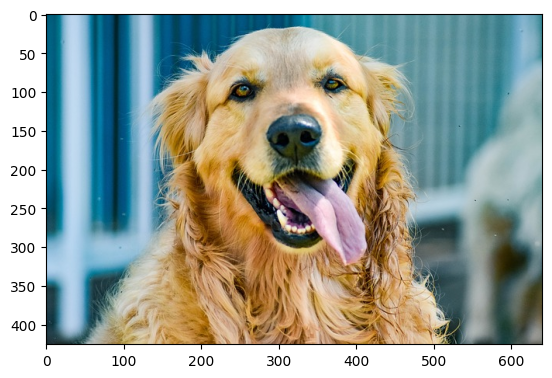

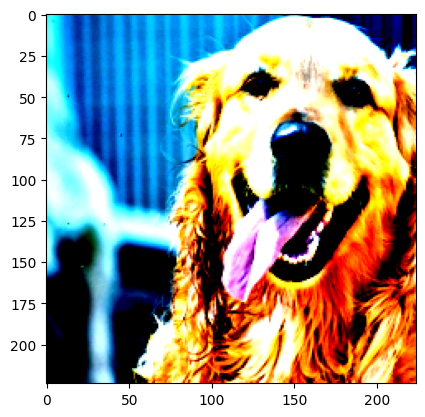

In [7]:
image_file_path = './data/goldenretriever-3724972_640.jpg'
img = Image.open(image_file_path)

plt.imshow(img)
plt.show()

size = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

transform = ImageTransform(size, mean, std)
img_transformed = transform(img, phase="train")

img_transformed = img_transformed.numpy().transpose(1, 2, 0)
img_transformed = np.clip(img_transformed, 0, 1)
plt.imshow(img_transformed)
plt.show()

In [9]:
def make_datapath_list(phase="train"):
    rootpath = "./data/hymenoptera_data/"
    target_path = osp.join(rootpath+phase+'/**/*.jpg')
    print(target_path)
    
    path_list = []
    
    for path in glob.glob(target_path):
        path_list.append(path)
        
    return path_list

train_list = make_datapath_list("train")
val_list = make_datapath_list("val")

train_list

./data/hymenoptera_data/train/**/*.jpg
./data/hymenoptera_data/val/**/*.jpg


['./data/hymenoptera_data/train/ants/0013035.jpg',
 './data/hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg',
 './data/hymenoptera_data/train/ants/1095476100_3906d8afde.jpg',
 './data/hymenoptera_data/train/ants/1099452230_d1949d3250.jpg',
 './data/hymenoptera_data/train/ants/116570827_e9c126745d.jpg',
 './data/hymenoptera_data/train/ants/1225872729_6f0856588f.jpg',
 './data/hymenoptera_data/train/ants/1262877379_64fcada201.jpg',
 './data/hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg',
 './data/hymenoptera_data/train/ants/1286984635_5119e80de1.jpg',
 './data/hymenoptera_data/train/ants/132478121_2a430adea2.jpg',
 './data/hymenoptera_data/train/ants/1360291657_dc248c5eea.jpg',
 './data/hymenoptera_data/train/ants/1368913450_e146e2fb6d.jpg',
 './data/hymenoptera_data/train/ants/1473187633_63ccaacea6.jpg',
 './data/hymenoptera_data/train/ants/148715752_302c84f5a4.jpg',
 './data/hymenoptera_data/train/ants/1489674356_09d48dde0a.jpg',
 './data/hymenoptera_data/train/ants/14924

In [ ]:
class HymenopteraDataset():
    def __init__(self, file_list, transform=None, phase='train'):
        self.file_list = file_list
        